# Summary 

### 1. This notebook covers obtaining the process from 11k elevation certificates from Forerunner, data cleaning, data training, and validation.
### 2. First floor elevation and Lowest floor elevation were tested here and additional 4K elevation certificates were used to validate the regression model. 


# Test 1：Predict FFE

## 1.1 Full model_ Data mining 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression
import seaborn as sns

# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydot
import pydotplus
from IPython.display import Image 

from matplotlib import pyplot as plt

In [90]:
data = pd.read_csv('final_data_3_no_null_FFE.csv') 
data.describe()


,OBJECTID,A5_LATITUD,A5_LONGITU,B9_BASE_FL_88,D_grade_88,tax_stor,tax_ybuilt,tax_bldgva,DEM,FFE_88
count,3128.000000,3.128000e+03,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03,3128.000000,3128.000000
mean,3565.732417,3.803311e+05,119394.886571,9.790415,0.750454,1.664322,1996.256074,9.090256e+05,7.296355,12.482079
std,2174.884919,5.974269e+05,187516.290817,2.214065,0.964872,0.891551,19.816087,3.623862e+06,2.731467,5.947166
min,1.000000,0.000000e+00,0.000000,-0.863000,-11.200000,0.000000,1900.000000,0.000000e+00,-1.000000,5.227000
25%,1752.750000,0.000000e+00,0.000000,9.000000,0.200000,1.000000,1990.000000,1.716775e+05,5.000000,9.400000
50%,3378.500000,0.000000e+00,0.000000,9.137000,0.500000,1.000000,2003.000000,3.044360e+05,7.000000,10.540000
75%,5540.500000,1.263965e+06,404297.217700,11.000000,0.970000,2.000000,2007.000000,5.616262e+05,9.000000,13.137000
max,7967.000000,1.396276e+06,460706.023500,18.137000,11.100000,16.000000,2019.000000,7.211882e+07,17.000000,110.837000


In [91]:
# delet the ID, LAT, and LONG 
df=data.iloc[:,3:13]
df.describe()

,B9_BASE_FL_88,D_grade_88,tax_stor,tax_ybuilt,tax_bldgva,DEM,FFE_88
count,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03,3128.000000,3128.000000
mean,9.790415,0.750454,1.664322,1996.256074,9.090256e+05,7.296355,12.482079
std,2.214065,0.964872,0.891551,19.816087,3.623862e+06,2.731467,5.947166
min,-0.863000,-11.200000,0.000000,1900.000000,0.000000e+00,-1.000000,5.227000
25%,9.000000,0.200000,1.000000,1990.000000,1.716775e+05,5.000000,9.400000
50%,9.137000,0.500000,1.000000,2003.000000,3.044360e+05,7.000000,10.540000
75%,11.000000,0.970000,2.000000,2007.000000,5.616262e+05,9.000000,13.137000
max,18.137000,11.100000,16.000000,2019.000000,7.211882e+07,17.000000,110.837000


### 1.1.1 One-Hot Encoding

In [92]:
# One-hot encode the data using pandas get_dummies
df_dum = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
df_dum.head(5)
df_dum.describe()

,B9_BASE_FL_88,D_grade_88,tax_stor,tax_ybuilt,tax_bldgva,DEM,FFE_88,B8_FZ_SIMP_A,B8_FZ_SIMP_AE,B8_FZ_SIMP_Low_risk,B8_FZ_SIMP_V,tax_found_Continuous Footing,tax_found_Piers,tax_found_Sfha Foundation,tax_found_Special Footing,tax_found_Special Footing Concre,tax_found_Special Footing Wood,tax_found_Spread/Mono Footing
count,3128.000000,3128.000000,3128.000000,3128.000000,3.128000e+03,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000
mean,9.790415,0.750454,1.664322,1996.256074,9.090256e+05,7.296355,12.482079,0.336957,0.584719,0.022059,0.056266,0.687340,0.031330,0.005115,0.016304,0.002877,0.207161,0.049872
std,2.214065,0.964872,0.891551,19.816087,3.623862e+06,2.731467,5.947166,0.472745,0.492849,0.146898,0.230471,0.463651,0.174236,0.071348,0.126664,0.053571,0.405337,0.217716
min,-0.863000,-11.200000,0.000000,1900.000000,0.000000e+00,-1.000000,5.227000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.200000,1.000000,1990.000000,1.716775e+05,5.000000,9.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.137000,0.500000,1.000000,2003.000000,3.044360e+05,7.000000,10.540000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,0.970000,2.000000,2007.000000,5.616262e+05,9.000000,13.137000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.137000,11.100000,16.000000,2019.000000,7.211882e+07,17.000000,110.837000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df_x= df_dum.drop('FFE_88', axis = 1)
df_FFE_y = np.array(df_dum['FFE_88'])

# Saving feature names for later use
feature_list = list(df_x.columns)

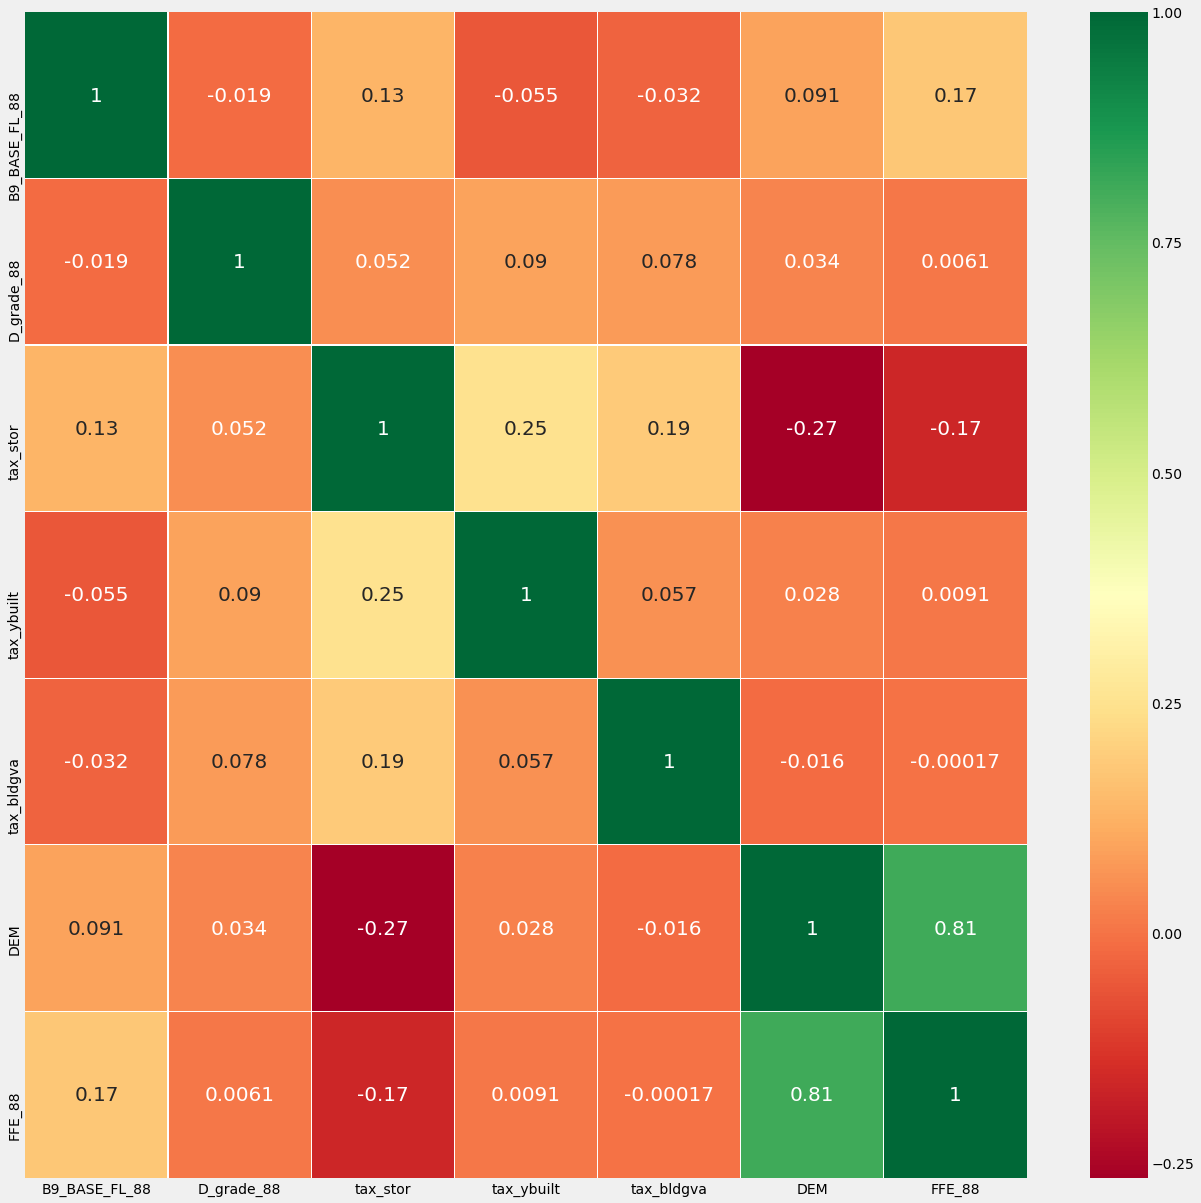

In [94]:
X = data.iloc[:,3:14]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=0.1,annot_kws={"size": 20})


## 1.1.2 Split the data into training and test dataset 

In [95]:

# Split the data into training and testing sets
train_data, test_data, train_FFE_88, test_FFE_88 = train_test_split(df_x, df_FFE_y, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_FFE_88.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_FFE_88.shape)

#test_FFE_88.describe()
train_data.describe()
train_FFE_88

Training Features Shape: (2502, 17)
Training Labels Shape: (2502,)
Testing Features Shape: (626, 17)
Testing Labels Shape: (626,)


array([17.5  , 21.36 ,  8.437, ..., 13.63 , 18.16 , 10.8  ])

# 1.2 model training 

## 1.2.1 baseline model- Linear regression

In [96]:
regressor = LinearRegression()  
regressor.fit(train_data,train_FFE_88,)
y_pred=regressor.predict(test_data)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_FFE_88, y_pred)))



Root Mean Squared Error: 4.266763732176326


#### get 95% CI 

In [97]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm

def get_prediction_interval(prediction, y_test, test_predictions, pi=.95):  
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper

In [98]:
pred_CI= get_prediction_interval(y_pred, test_FFE_88, y_pred)
pred_CI=pd.DataFrame(pred_CI)
pred_CI

,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,625
0,16.735574,6.708053,2.743868,0.029235,12.204787,-2.715514,6.275415,-0.500319,3.380418,4.352838,...,9.095737,1.744985,3.114668,3.218903,-0.103965,0.138032,5.463378,-1.999549,7.330130,6.427616
1,25.111668,15.084147,11.119962,8.405330,20.580882,5.660580,14.651509,7.875776,11.756512,12.728932,...,17.471832,10.121080,11.490762,11.594998,8.272129,8.514126,13.839472,6.376546,15.706225,14.803710
2,33.487763,23.460241,19.496057,16.781424,28.956976,14.036674,23.027603,16.251870,20.132606,21.105027,...,25.847926,18.497174,19.866856,19.971092,16.648224,16.890220,22.215567,14.752640,24.082319,23.179805


Text(0, 0.5, 'FFE')

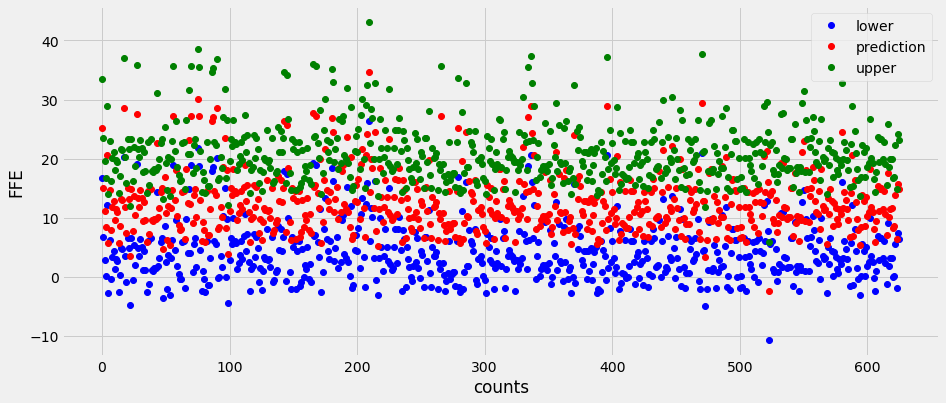

In [99]:
import matplotlib.pyplot as plt

#Create a figure with a certain size
plt.figure(figsize = (14, 6))

#Plot x versus y
plt.plot(pred_CI.iloc[0],'o', color = "blue",label = "lower")
plt.plot(pred_CI.iloc[1], 'o',color = "red", label = "prediction")
plt.plot(pred_CI.iloc[2], 'o',color = "green",label = "upper")

# show a legend on the plot 
plt.legend() 

# naming the x axis 
plt.xlabel('counts') 
# naming the y axis 
plt.ylabel('FFE')


## 1.2.2 GradientBoosting

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

GBMRegressor = GradientBoostingRegressor(learning_rate=0.1, random_state=0, max_features='sqrt', subsample=0.8, n_estimators = 70)
GBMRegressor.fit(X=train_data,y=train_FFE_88)
                 
y_GBM = GBMRegressor.predict(test_data) 
# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_FFE_88, y_GBM)))


Root Mean Squared Error: 2.294333700346851


## 1.2.3 Random forest 

In [101]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(train_data, train_FFE_88);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_FFE_88, predictions)))


Root Mean Squared Error: 1.8324640952932891


## 1.2.4 feature importances

In [102]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEM                  Importance: 0.93
Variable: B9_BASE_FL_88        Importance: 0.02
Variable: tax_ybuilt           Importance: 0.02
Variable: tax_bldgva           Importance: 0.02
Variable: D_grade_88           Importance: 0.01
Variable: tax_found_Piers      Importance: 0.01
Variable: tax_stor             Importance: 0.0
Variable: B8_FZ_SIMP_A         Importance: 0.0
Variable: B8_FZ_SIMP_AE        Importance: 0.0
Variable: B8_FZ_SIMP_Low_risk  Importance: 0.0
Variable: B8_FZ_SIMP_V         Importance: 0.0
Variable: tax_found_Continuous Footing Importance: 0.0
Variable: tax_found_Sfha Foundation Importance: 0.0
Variable: tax_found_Special Footing Importance: 0.0
Variable: tax_found_Special Footing Concre Importance: 0.0
Variable: tax_found_Special Footing Wood Importance: 0.0
Variable: tax_found_Spread/Mono Footing Importance: 0.0


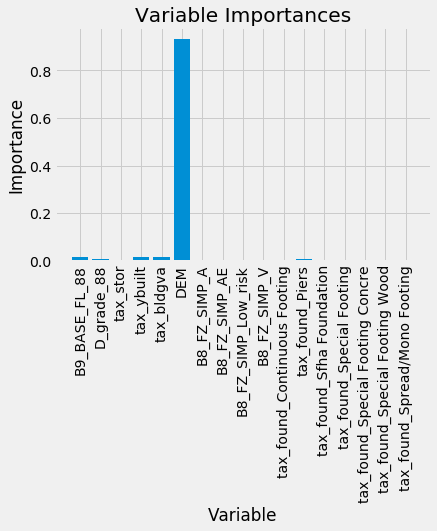

In [103]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 1.2 Reduced model 

In [3]:
data1 = pd.read_csv('final_data_3_no_null_FFE_selected.csv') 
data1.describe()

,B9_BASE_FL_88,D_grade_88,tax_ybuilt,tax_bldgva,DEM,FFE_88
count,3128.000000,3128.000000,3128.000000,3.128000e+03,3128.000000,3128.000000
mean,9.790415,0.750454,1996.256074,9.090256e+05,7.296355,12.482079
std,2.214065,0.964872,19.816087,3.623862e+06,2.731467,5.947166
min,-0.863000,-11.200000,1900.000000,0.000000e+00,-1.000000,5.227000
25%,9.000000,0.200000,1990.000000,1.716775e+05,5.000000,9.400000
50%,9.137000,0.500000,2003.000000,3.044360e+05,7.000000,10.540000
75%,11.000000,0.970000,2007.000000,5.616262e+05,9.000000,13.137000
max,18.137000,11.100000,2019.000000,7.211882e+07,17.000000,110.837000


In [4]:

df_x= data1.drop('FFE_88', axis = 1)
df_FFE_y = np.array(data1['FFE_88'])

# Saving feature names for later use
feature_list = list(df_x.columns)
df_x.describe()

,B9_BASE_FL_88,D_grade_88,tax_ybuilt,tax_bldgva,DEM
count,3128.000000,3128.000000,3128.000000,3.128000e+03,3128.000000
mean,9.790415,0.750454,1996.256074,9.090256e+05,7.296355
std,2.214065,0.964872,19.816087,3.623862e+06,2.731467
min,-0.863000,-11.200000,1900.000000,0.000000e+00,-1.000000
25%,9.000000,0.200000,1990.000000,1.716775e+05,5.000000
50%,9.137000,0.500000,2003.000000,3.044360e+05,7.000000
75%,11.000000,0.970000,2007.000000,5.616262e+05,9.000000
max,18.137000,11.100000,2019.000000,7.211882e+07,17.000000


In [5]:
# Split the data into training and testing sets
train_data_rd, test_data_rd, train_FFE_88_rd, test_FFE_88_rd = train_test_split(df_x, df_FFE_y, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_data_rd.shape)
print('Training Labels Shape:', train_FFE_88_rd.shape)
print('Testing Features Shape:', test_data_rd.shape)
print('Testing Labels Shape:', test_FFE_88_rd.shape)

#test_FFE_88.describe()
train_data_rd.describe()
train_FFE_88_rd

Training Features Shape: (2502, 5)
Training Labels Shape: (2502,)
Testing Features Shape: (626, 5)
Testing Labels Shape: (626,)


array([10.137, 10.987, 10.577, ...,  9.637, 10.17 ,  8.637])

In [6]:
regressor = LinearRegression()  
regressor.fit(train_data_rd,train_FFE_88_rd,)
y_pred_rd=regressor.predict(test_data_rd)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_FFE_88_rd, y_pred_rd)))

Root Mean Squared Error: 4.082521340261171


In [7]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_data_rd, train_FFE_88_rd);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data_rd)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_FFE_88_rd, predictions)))


Root Mean Squared Error: 0.871803231146161


## 1.3 Predicted vs real 

Text(0, 0.5, 'FFE')

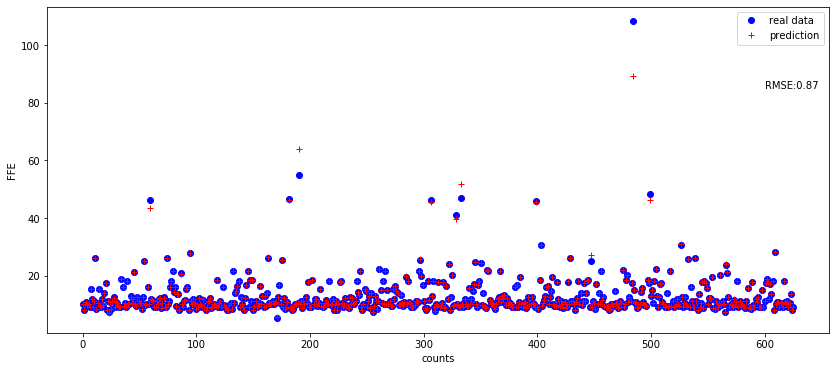

In [8]:
import matplotlib.pyplot as plt

#Create a figure with a certain size
plt.figure(figsize = (14, 6))

#Plot x versus y
plt.plot(test_FFE_88_rd,'o', color = "blue",label = "real data")
plt.plot(predictions, '+',color = "red", label = "prediction")

plt.text(600, 85, "RMSE:0.87")

# show a legend on the plot 
plt.legend() 

# naming the x axis 
plt.xlabel('counts') 
# naming the y axis 
plt.ylabel('FFE')


In [9]:
df = pd.DataFrame({'real data_FFE': test_FFE_88_rd,
                   'prediction_FFE': predictions})
df.to_csv('FFE.csv', index=False)

In [279]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEM                  Importance: 0.94
Variable: tax_bldgva           Importance: 0.03
Variable: B9_BASE_FL_88        Importance: 0.02
Variable: D_grade_88           Importance: 0.01
Variable: tax_ybuilt           Importance: 0.01


# Test 2：Predict LFE

## 2.1 Full model 

In [12]:
data = pd.read_csv('final_data_3_no_null_LFE.csv') 
data.describe()
# delet the ID, LAT, and LONG 
df=data.iloc[:,3:15]
df.describe()

,B9_BASE_FL_88,LAG_88,HAG_88,D_grade_88,tax_stor,tax_ybuilt,tax_bldgva,DEM,LFE_88
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000
mean,9.955852,7.563600,8.321917,0.758317,1.664740,1996.267823,9.626076e+05,7.758831,11.255734
std,3.137532,5.212432,5.222756,0.991974,0.904354,19.881698,4.870130e+06,4.441933,5.539086
min,-0.863000,-12.300000,-1.200000,-11.200000,0.000000,1900.000000,0.000000e+00,-1.000000,7.300000
25%,9.000000,5.137750,5.800000,0.200000,1.000000,1991.000000,1.721792e+05,5.000000,8.900000
50%,9.137000,6.637000,7.558500,0.500000,1.000000,2003.000000,3.073740e+05,7.000000,9.837000
75%,11.000000,8.637000,9.437000,1.000000,2.000000,2007.000000,5.692592e+05,9.000000,11.500000
max,45.000000,107.637000,108.137000,11.100000,16.000000,2019.000000,1.979563e+08,90.000000,108.137000


In [13]:
# One-hot encode the data using pandas get_dummies
df_dum = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
df_dum.head(5)
df_dum.describe()

,B9_BASE_FL_88,LAG_88,HAG_88,D_grade_88,tax_stor,tax_ybuilt,tax_bldgva,DEM,LFE_88,B8_FZ_SIMP_A,...,B8_FZ_SIMP_Low_risk,B8_FZ_SIMP_V,B8_FZ_SIMP_ae,tax_found_Continuous Footing,tax_found_Piers,tax_found_Sfha Foundation,tax_found_Special Footing,tax_found_Special Footing Concre,tax_found_Special Footing Wood,tax_found_Spread/Mono Footing
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000,3114.000000,...,3114.000000,3114.000000,3114.000000,3114.000000,3114.00000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,9.955852,7.563600,8.321917,0.758317,1.664740,1996.267823,9.626076e+05,7.758831,11.255734,0.340719,...,0.023443,0.056198,0.014130,0.686898,0.03115,0.005138,0.016378,0.002890,0.206487,0.051060
std,3.137532,5.212432,5.222756,0.991974,0.904354,19.881698,4.870130e+06,4.441933,5.539086,0.474027,...,0.151329,0.230340,0.118045,0.463830,0.17375,0.071508,0.126943,0.053691,0.404849,0.220155
min,-0.863000,-12.300000,-1.200000,-11.200000,0.000000,1900.000000,0.000000e+00,-1.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,5.137750,5.800000,0.200000,1.000000,1991.000000,1.721792e+05,5.000000,8.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.137000,6.637000,7.558500,0.500000,1.000000,2003.000000,3.073740e+05,7.000000,9.837000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,8.637000,9.437000,1.000000,2.000000,2007.000000,5.692592e+05,9.000000,11.500000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,107.637000,108.137000,11.100000,16.000000,2019.000000,1.979563e+08,90.000000,108.137000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


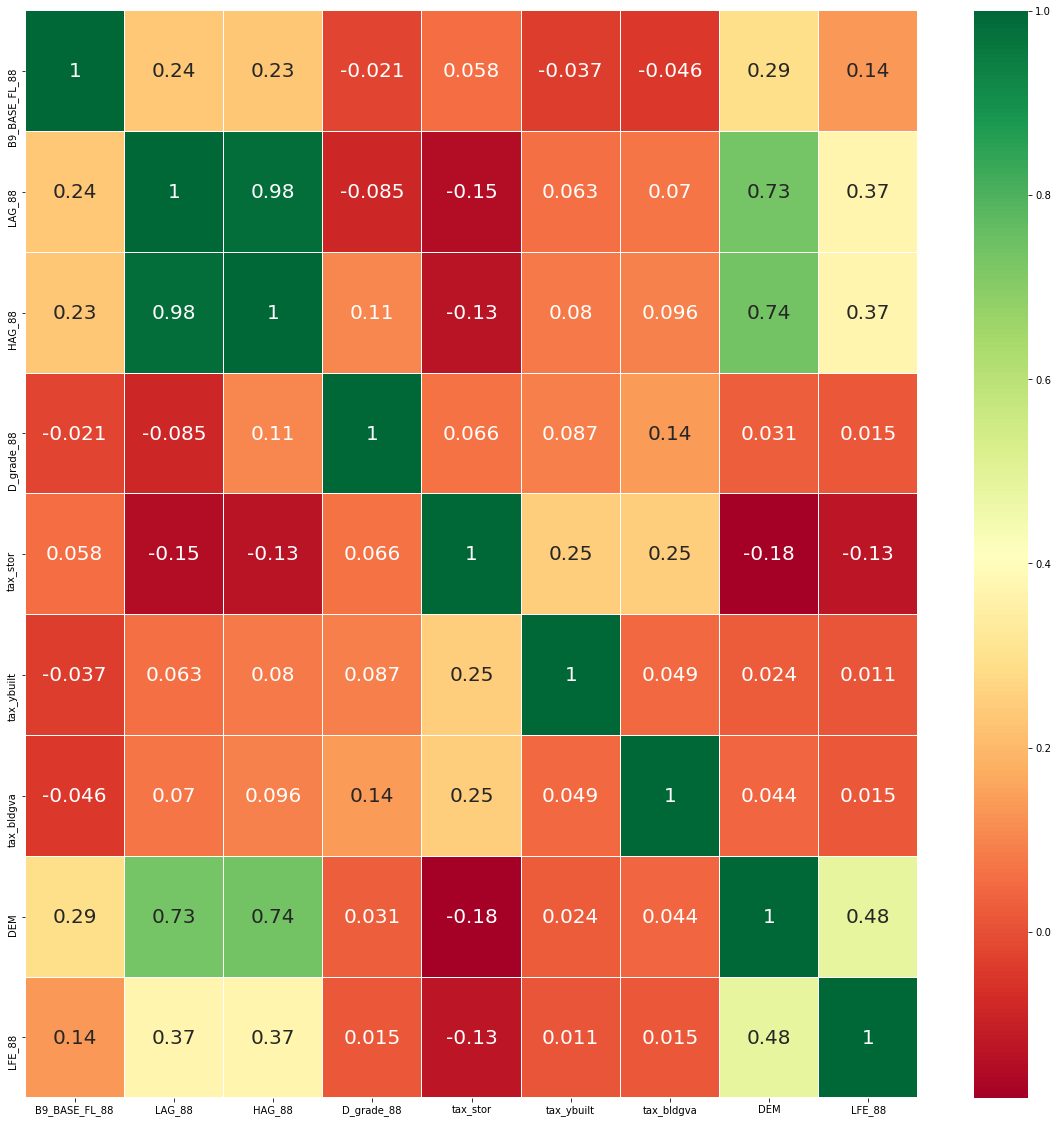

In [14]:
df_x= df_dum.drop('LFE_88', axis = 1)
df_LFE_y = np.array(df_dum['LFE_88'])
# Saving feature names for later use
feature_list = list(df_x.columns)

X = data.iloc[:,3:14]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=0.1,annot_kws={"size": 20})


In [15]:
# Split the data into training and testing sets
train_data, test_data, train_LFE_88, test_LFE_88 = train_test_split(df_x, df_LFE_y, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_LFE_88.shape)
print('Testing Features Shape:', test_data.shape)
print('Testing Labels Shape:', test_LFE_88.shape)

#test_FFE_88.describe()
train_data.describe()
train_LFE_88

Training Features Shape: (2491, 20)
Training Labels Shape: (2491,)
Testing Features Shape: (623, 20)
Testing Labels Shape: (623,)


array([ 8.537,  8.537, 10.   , ...,  9.27 ,  9.42 ,  9.017])

In [16]:
regressor = LinearRegression()  
regressor.fit(train_data,train_LFE_88,)
y_pred=regressor.predict(test_data)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88, y_pred)))


Root Mean Squared Error: 3.5330134107605637


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

GBMRegressor = GradientBoostingRegressor(learning_rate=0.1, random_state=0, max_features='sqrt', subsample=0.8, n_estimators = 70)
GBMRegressor.fit(X=train_data,y=train_LFE_88)
                 
y_GBM = GBMRegressor.predict(test_data) 
# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88, y_GBM)))

Root Mean Squared Error: 3.3764394079966507


In [18]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(train_data, train_LFE_88);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88, predictions)))

Root Mean Squared Error: 2.566574555633571


In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEM                  Importance: 0.54
Variable: B9_BASE_FL_88        Importance: 0.11
Variable: HAG_88               Importance: 0.11
Variable: tax_bldgva           Importance: 0.08
Variable: LAG_88               Importance: 0.06
Variable: tax_ybuilt           Importance: 0.04
Variable: D_grade_88           Importance: 0.03
Variable: tax_stor             Importance: 0.0
Variable: B8_FZ_SIMP_A         Importance: 0.0
Variable: B8_FZ_SIMP_AE        Importance: 0.0
Variable: B8_FZ_SIMP_Low_risk  Importance: 0.0
Variable: B8_FZ_SIMP_V         Importance: 0.0
Variable: B8_FZ_SIMP_ae        Importance: 0.0
Variable: tax_found_Continuous Footing Importance: 0.0
Variable: tax_found_Piers      Importance: 0.0
Variable: tax_found_Sfha Foundation Importance: 0.0
Variable: tax_found_Special Footing Importance: 0.0
Variable: tax_found_Special Footing Concre Importance: 0.0
Variable: tax_found_Special Footing Wood Importance: 0.0
Variable: tax_found_Spread/Mono Footing Importance: 0.0


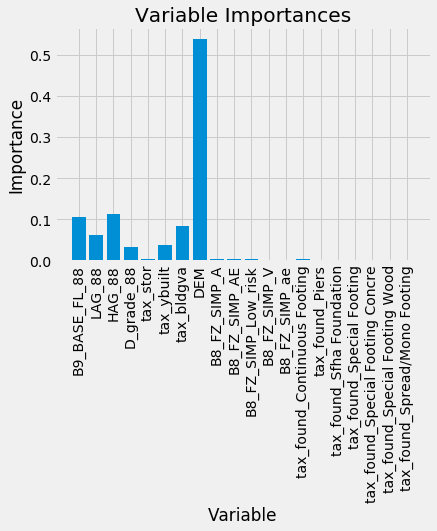

In [20]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 2.2 Reduce model 

In [21]:
data1 = pd.read_csv('final_data_3_no_null_LFE_selected.csv') 
data1.describe(include = 'all')

,B9_BASE_FL_88,HAG_88,tax_ybuilt,tax_bldgva,DEM,LFE_88
count,3114.000000,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000
mean,9.955852,8.321917,1996.267823,9.626076e+05,7.758831,11.255734
std,3.137532,5.222756,19.881698,4.870130e+06,4.441933,5.539086
min,-0.863000,-1.200000,1900.000000,0.000000e+00,-1.000000,7.300000
25%,9.000000,5.800000,1991.000000,1.721792e+05,5.000000,8.900000
50%,9.137000,7.558500,2003.000000,3.073740e+05,7.000000,9.837000
75%,11.000000,9.437000,2007.000000,5.692592e+05,9.000000,11.500000
max,45.000000,108.137000,2019.000000,1.979563e+08,90.000000,108.137000


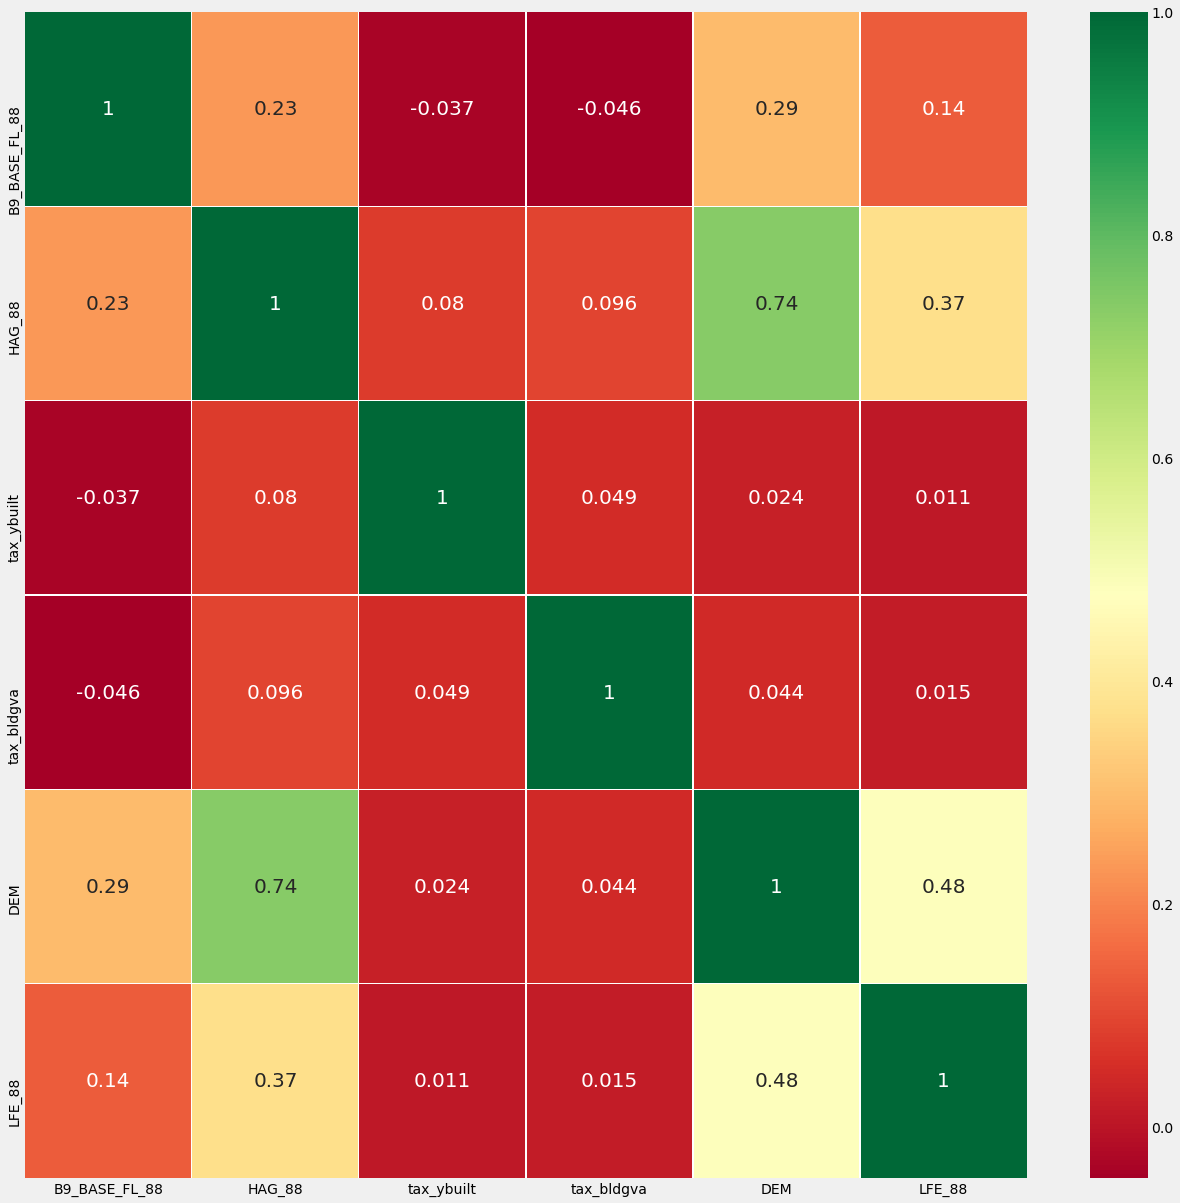

In [22]:
df_x= data1.drop('LFE_88', axis = 1)
df_LFE_y = np.array(data1['LFE_88'])
# Saving feature names for later use
feature_list = list(df_x.columns)

#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=0.1,annot_kws={"size": 20})

In [23]:
# Split the data into training and testing sets
train_data_rd, test_data_rd, train_LFE_88_rd, test_LFE_88_rd = train_test_split(df_x, df_LFE_y, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_data_rd.shape)
print('Training Labels Shape:', train_LFE_88_rd.shape)
print('Testing Features Shape:', test_data_rd.shape)
print('Testing Labels Shape:', test_LFE_88_rd.shape)

#test_FFE_88.describe()
train_data_rd.describe()
train_LFE_88_rd

Training Features Shape: (2491, 5)
Training Labels Shape: (2491,)
Testing Features Shape: (623, 5)
Testing Labels Shape: (623,)


array([ 8.537,  8.537, 10.   , ...,  9.27 ,  9.42 ,  9.017])

In [24]:
regressor = LinearRegression()  
regressor.fit(train_data_rd,train_LFE_88_rd,)
y_pred=regressor.predict(test_data_rd)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88_rd, y_pred)))


Root Mean Squared Error: 3.528994065780629


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

GBMRegressor = GradientBoostingRegressor(learning_rate=0.1, random_state=0, max_features='sqrt', subsample=0.8, n_estimators = 70)
GBMRegressor.fit(X=train_data_rd,y=train_LFE_88_rd)
                 
y_GBM = GBMRegressor.predict(test_data_rd) 
# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88_rd, y_GBM)))

Root Mean Squared Error: 2.925491135813738


In [26]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_data_rd, train_LFE_88_rd);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data_rd)

# Calculate the RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_LFE_88_rd, predictions)))

Root Mean Squared Error: 2.6208895769118645


Text(0, 0.5, 'LFE')

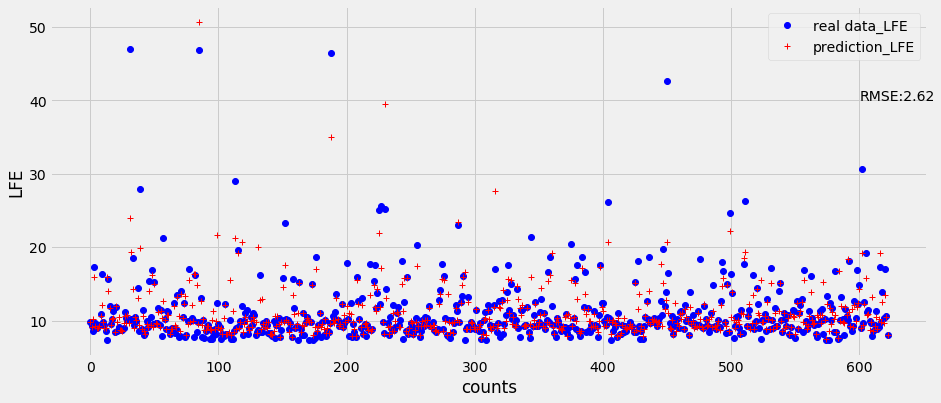

In [27]:
import matplotlib.pyplot as plt

#Create a figure with a certain size
plt.figure(figsize = (14, 6))

#Plot x versus y
plt.plot(test_LFE_88_rd,'o', color = "blue",label = "real data_LFE")
plt.plot(predictions, '+',color = "red", label = "prediction_LFE")

plt.text(600, 40, "RMSE:2.62")

# show a legend on the plot 
plt.legend() 

# naming the x axis 
plt.xlabel('counts') 
# naming the y axis 
plt.ylabel('LFE')


In [28]:
df = pd.DataFrame({'real data_LFE': test_LFE_88_rd,
                   'prediction_LFE': predictions})
df.to_csv('LFE.csv', index=False)

In [84]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEM                  Importance: 0.58
Variable: HAG_88               Importance: 0.15
Variable: B9_BASE_FL_88        Importance: 0.11
Variable: tax_bldgva           Importance: 0.11
Variable: tax_ybuilt           Importance: 0.06


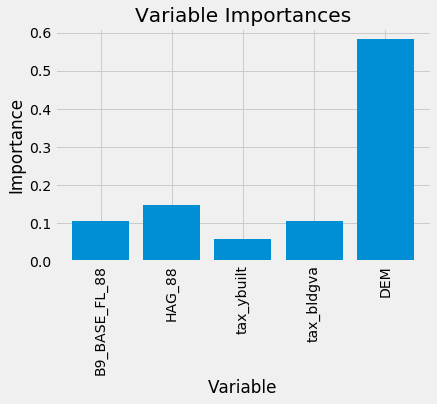

In [85]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Test 3: Validation_LFE

In [84]:
data2 = pd.read_csv('validation_LFE_88_selected.csv') 
data2.head(5)
data2.describe(include = 'all')

,B9_BASE_FL_88,HAG_88,tax_ybuilt,tax_bldgva,DEM,LFE_88
count,2531.000000,2531.000000,2531.000000,2.531000e+03,2531.000000,2531.000000
mean,11.163512,8.217377,1919.174239,1.757325e+05,7.757408,9.403923
std,4.877276,5.783443,326.770015,2.681901e+05,5.892551,6.087018
min,2.000000,2.000000,0.000000,0.000000e+00,-1.000000,2.280000
25%,9.000000,5.400000,1957.000000,7.284150e+04,5.000000,5.900000
50%,10.000000,6.700000,1970.000000,1.187300e+05,6.000000,7.600000
75%,12.000000,8.965000,1988.000000,1.903950e+05,8.000000,10.700000
max,64.100000,63.100000,2019.000000,4.837944e+06,64.000000,63.400000


In [85]:
df_x_2= data2.drop('LFE_88', axis = 1)
df_LFE_y_2 = np.array(data2['LFE_88'])
# Saving feature names for later use
feature_list = list(df_x_2.columns)


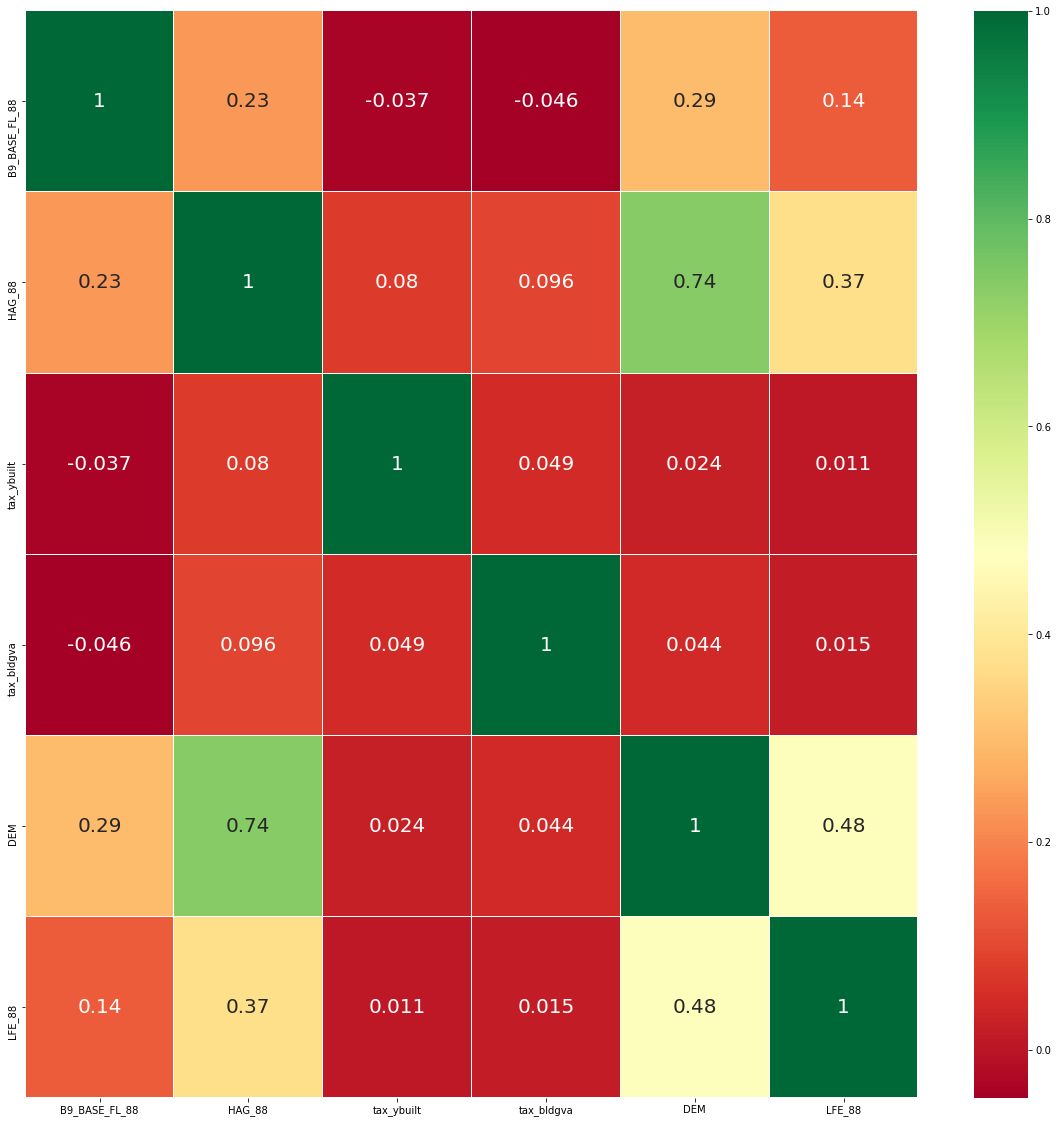

In [86]:
#get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=0.1,annot_kws={"size": 20})

In [99]:
# liner model validation 
y_pred=regressor.predict(df_x_2)
# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_LFE_y_2, y_pred)))

Root Mean Squared Error: 4.2241486504490755


In [100]:
from sklearn.ensemble import GradientBoostingRegressor
                 
y_GBM = GBMRegressor.predict(df_x_2) 
# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_LFE_y_2, y_GBM)))

Root Mean Squared Error: 7.381732396403569


In [94]:
# Random forest validation 
# Use the forest's predict method on the test data
predictions_va = rf.predict(df_x_2)

# Calculate the MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_LFE_y_2, predictions_va)))


Root Mean Squared Error: 7.926929992971985
